In [1]:
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from time import time
from operator import itemgetter

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import re

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline
import seaborn
import numpy.random as nprnd
import random
import json

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
import pydotplus 
import pydot
import graphviz
import pickle

pd.set_option('display.max_columns', 500)
#df = pd.read_csv('C:\\Users\\Siddarth\\Documents\\GitHub\\HeartData_All.csv', index_col=0)
df = pd.read_csv('C:\\Users\\Siddarth\\Documents\\GitHub\\frmgham2.csv', index_col=0)
df = df.dropna()   
df.head()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,Outcome
S no,,,,,,,,,,,,,,
1,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,1
3,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0
4,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0
5,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0
6,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,1.0,0


In [2]:
y = df['Outcome']
#X = df.drop(['Goal', 'Outcome', 'Old peak ST','Slope','Thal','Ca'], axis = 1)
X = df.drop(['Outcome'], axis  = 1)

In [4]:
X.shape

(9310, 13)

141

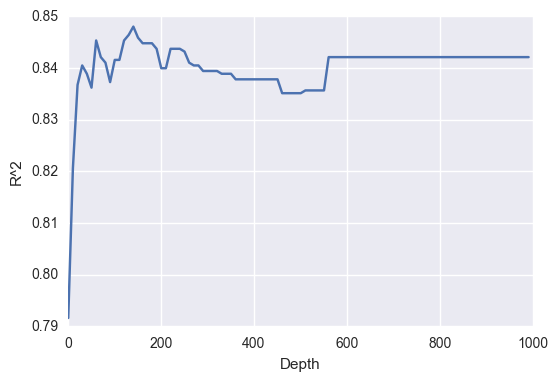

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,1000,10)
for n in depths:
    regr = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
n_opt

In [5]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=141)
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print("Mean: ", np.mean(scores), "Standard deviation: ", np.std(scores))

[ 0.84763948  0.82725322  0.84120172  0.84763948  0.85069817  0.85606874
  0.83655914  0.82365591  0.85268817  0.83978495]
Mean:  0.842318899492 Standard deviation:  0.0101957595479


In [22]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

def run_gridsearch(X, y, clf, param_grid, cv=5):
    """Run a grid search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_grid -- [dict] parameter settings to test
    cv -- fold of cross-validation, default 5

    Returns
    -------
    top_params -- [dict] from report()
    """
    grid_search = GridSearchCV(clf,
                               param_grid=param_grid,
                               cv=cv)
    start = time()
    grid_search.fit(X, y)

    print(("\nGridSearchCV took {:.2f} "
           "seconds for {:d} candidate "
           "parameter settings.").format(time() - start,
                len(grid_search.grid_scores_)))

    top_params = report(grid_search.grid_scores_, 3)
    return  top_params

param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 40, 50, 100],
              "max_depth": [None, 2, 10, 20, 30, 40],
              "min_samples_leaf": [1, 20, 40, 60, 80, 100, 120, 140, 160],
              "max_leaf_nodes": [None, 5, 10, 20, 30, 40, 50],
              }

dt = DecisionTreeClassifier()
ts_gs = run_gridsearch(X, y, dt, param_grid, cv=10)


GridSearchCV took 1334.96 seconds for 4536 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.845 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 100, 'min_samples_split': 2, 'max_leaf_nodes': None}

Model with rank: 2
Mean validation score: 0.845 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 100, 'min_samples_split': 10, 'max_leaf_nodes': None}

Model with rank: 3
Mean validation score: 0.845 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 100, 'min_samples_split': 20, 'max_leaf_nodes': None}



C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(criterion= 'gini', max_depth= None, min_samples_leaf= 100, min_samples_split= 2,
                               max_leaf_nodes= None)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    #X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    #X_train, X_test = X[:half], X[half:]
    #y_train, y_test = y[:half], y[half:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % (roc_auc))
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

Area under the ROC curve : 0.861476


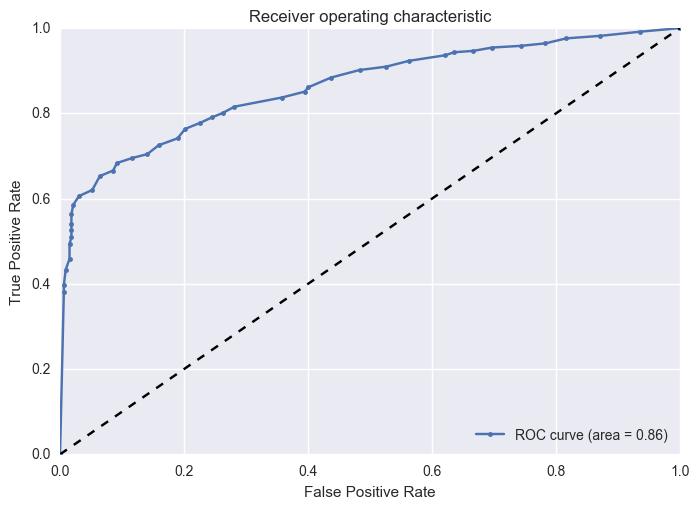

In [10]:
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,DecisionTreeClassifier,criterion= 'gini',
                                           max_depth= None, min_samples_leaf= 100, min_samples_split= 2,max_leaf_nodes= None)

generate_ROCplot(fpr,tpr,'DT',roc_auc)

In [6]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [7]:
from __future__ import print_function

import os
import subprocess

dt=DecisionTreeRegressor(max_depth=3)
visualize_tree(model, feature_names=['x'])

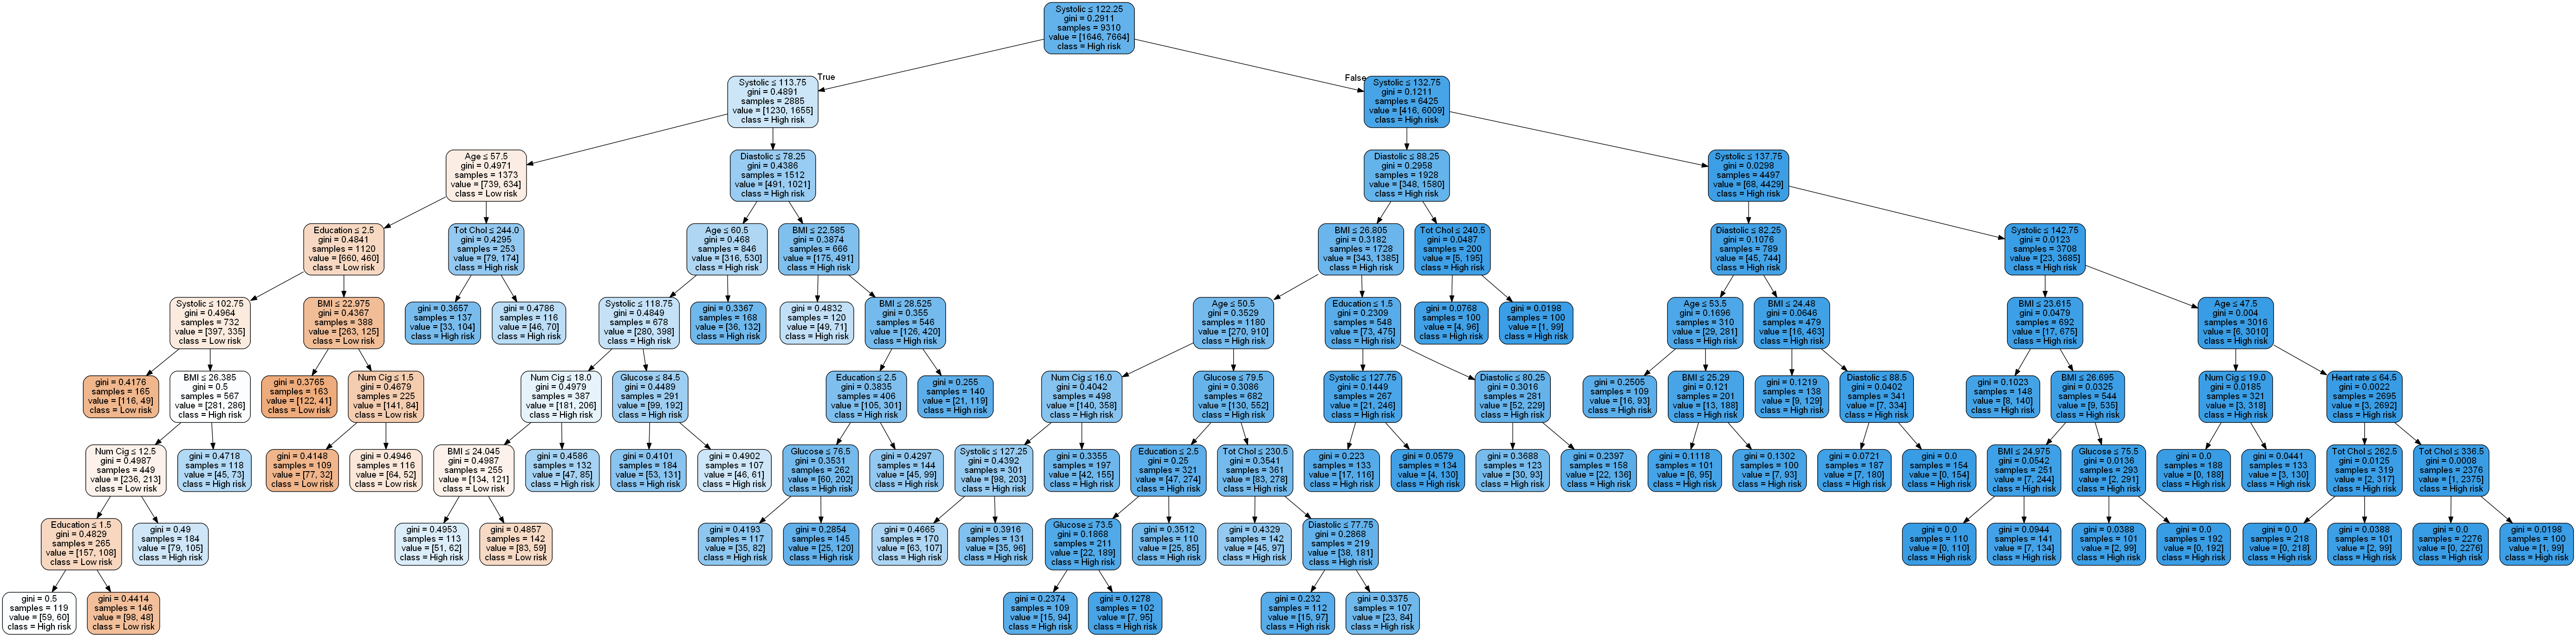

In [8]:
def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)
features = ['Sex', 'Tot Chol', 'Age', 'Systolic', 'Diastolic', 'Smoker?',
                 'Num Cig','BMI', 'Diabetes', 'BP meds?', 'Heart rate', 'Glucose','Education']
target = ['Low risk', 'High risk']
dot_data=export_graphviz(model, out_file=None,
                        feature_names=features,  
                         class_names=target,
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
conda_fix(graph)
Image(graph.create_png())

In [9]:
X_predict = [1, 230, 55, 100, 77, 1, 50, 31, 1, 1, 120, 102, 1]
y_predict = model.predict(X_predict)
y_predict_proba = model.predict_proba(X_predict)
y_predict_log_proba = model.predict_log_proba(X_predict)
print('Outcome:',y_predict)
print('Probability: ', np.amax(y_predict_proba)*100)
y_predict_log_proba
Path = model.decision_path(X_predict)
type(Path)
print(Path)

Outcome: [0]
Probability:  70.303030303
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

In [9]:
import pickle
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'framingham_pickle_file.pkl'
# Open the file to save as pkl file
heart_disease_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(model, heart_disease_model_pkl)
# Close the pickle instances
heart_disease_model_pkl.close()

In [17]:
if(y_predict == 1):
    print("High risk")
else:
    print("Low risk")

High risk


In [ ]:
bad_cols = ['complaint.frequency','complaint.count.00.to.60.days','prev.product.id','zip.attrition.rate','zip.complaint.credit.total.amount.per.sub.00.to.60.days','zip.complaint.count.per.sub.00.to.60.days','has.previous.product.id']
good_cols=['subscription.tenure.days','online.page.views','online.avg.session.length','prev.product.code','online.activity']
# This gets the score and complaint reasons for each leaf node.
def get_lineage(tree, feature_names):
     reasons=['start']
     reasons_all=[]
     rules=[]
     prob_leafs=[]
     left      = tree.tree_.children_left
     right     = tree.tree_.children_right
     threshold = tree.tree_.threshold
     features  = [feature_names[i] for i in tree.tree_.feature]

     # get ids of child nodes
     idx = np.argwhere(left == -1)[:,0]

     def recurse(left, right, child, lineage=None):
          if lineage is None:
               lineage = [child]
          if child in left:
               parent = np.where(left == child)[0].item()
               split = 'l'
          else:
               parent = np.where(right == child)[0].item()
               split = 'r'

          lineage.append((parent, split, threshold[parent], features[parent]))

          if parent == 0:
               lineage.reverse()
               return lineage
          else:
               return recurse(left, right, parent, lineage)

     for child in idx:
          reasons=[]
          for node in recurse(left, right, child):
               print(node)
               try:
                    if node[3] in bad_cols and node[1] == 'r' or node[3] in good_cols and node[1]=='l':
                        reasons.append(node[3])
               except:
                    print node
                    node_value=dt.tree_.value[node]
                    node_value = np.squeeze(node_value[0])

                    prob_leafs.append(float(node_value[1])/(node_value[1]+node_value[0]))

               rules.append(node)



          reasons_all.append(reasons)
     return prob_leafs, reasons_all
          #reasons=[]

# Get reasons associated with at risk score from model.

def get_reasons(account_id,df):
    #print df
    #print df.columns

    df_a=df[df['account.id']==account_id]
    df = df[df_trainonly.columns]
    df_a_t = df.loc[df_a.index]

    #print (df_a)
    try:
        risk_a = dt.predict_proba(df_a_t)
        risk_comparison = risk_a[0][1] - risk_scores
        leaf = np.where(risk_comparison==0)
        return account_id,risk_a[0][1], reasons[leaf[0]]
    except:
        print 'Failed at account id ', account_id
        return account_id,0.0,0.0